# Pandas Crash Course

<img style="float: right; border:3px solid black" src="images/10_Panda_DailyMail_7_Nov_2013.jpg" border="5" width=30%>

Pandas is a Python package that aims to make working with data as easy and intuitive as possible. It fills the role of a foundational real world data manipulation library and interfaces with many other Python packages.

By the end of this file you should have seen simple examples of:

1. Pandas Series and DataFrame objects
1. Data IO
1. Data types
1. Indexing and setting data
1. Dealing with missing data
1. Concatinating and merging data
1. Grouping Operations
1. Operations on Pandas data objects
1. Applying any function to Pandas data objects
1. Plotting

Further Reading:  
http://pandas.pydata.org/pandas-docs/stable/10min.html  
https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join  


Image Credit: David Jenkins at Bifengxia Panda Reserve in Chengdu

In [1]:
# Python imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Pandas Series and DataFrame objects

There are two main data structures in pandas:
-  Series (1 dimensional data)
-  Dataframes (2 dimensional data)
-  There are other, lesser used data structures used for higher dimensional data, but are less frequently used
    - Panel (3 dimensional data) - panel will be removed from future versions of Pandas and replaced with xarray
    -  Xarray (>2 dimensions)

Here, the 1- and 2-dimensional data sets are the focus of this lesson.

Pandas DataFrames are analogus to R's data.frame, but aim to provide additional functionality. 


Both dataframes and series data structures have indicies, which are shown on the left:

In [2]:
series1 = pd.Series([1,2,3,4])
print(series1)

0    1
1    2
2    3
3    4
dtype: int64


Dataframes use the IPython display method to look pretty, but will show just fine when printed also. (There's a way to make all of the dataframes print pretty via the IPython.display.display method, but this isn't necessary to view the values):

In [3]:
df1 = pd.DataFrame([[1,2,3,4],[10,20,30,40]])
print(df1)
df1

    0   1   2   3
0   1   2   3   4
1  10  20  30  40


,0,1,2,3
0,1,2,3,4
1,10,20,30,40


Indices can be named:

In [11]:
# Rename the columns
df1.columns = ['A','B','C','D']
df1.index = ['a','b']
df1

,A,B,C,D
a,1,2,3,4
b,10,20,30,40


In [13]:
# Create the dataframe with the columns
df1 = pd.DataFrame([[1,2,3,4],[10,20,30,40]], index=['a','b'], columns=['A','B','C',"D"])
df1

,A,B,C,D
a,1,2,3,4
b,10,20,30,40


## Data Input Output

In [6]:
df1 = pd.DataFrame(np.random.randn(5,4), columns = ['A','B','C','D'])
print(df1)

          A         B         C         D
0 -0.296496  1.380562 -0.231496 -0.175454
1  0.282585 -0.895520 -0.429703  0.321373
2  1.962107  0.851734  2.496211 -1.315997
3  1.193425  1.568826  0.065625  0.800815
4 -0.053121 -0.960280 -1.191639  0.708168


### CSV Files

In [7]:
df1.to_csv('datafiles/pandas_df1.csv')
% ls datafiles

01-simpledata.csv        01-simplemat_write.mat   pandas_df1.h5
01-simpledata_write.bin  01-simpletext.txt        presentation.mplstyle
01-simpledata_write.csv  01-simpletext_write.txt
01-simplemat.mat         pandas_df1.csv


In [8]:
df2 = pd.read_csv('datafiles/pandas_df1.csv', index_col=0)
print(df2)

          A         B         C         D
0 -0.296496  1.380562 -0.231496 -0.175454
1  0.282585 -0.895520 -0.429703  0.321373
2  1.962107  0.851734  2.496211 -1.315997
3  1.193425  1.568826  0.065625  0.800815
4 -0.053121 -0.960280 -1.191639  0.708168


### hdf5 files

In [9]:
df1.to_hdf('datafiles/pandas_df1.h5', 'df')
% ls datafiles

01-simpledata.csv        01-simplemat_write.mat   pandas_df1.h5
01-simpledata_write.bin  01-simpletext.txt        presentation.mplstyle
01-simpledata_write.csv  01-simpletext_write.txt
01-simplemat.mat         pandas_df1.csv


In [10]:
df2 = pd.read_hdf('datafiles/pandas_df1.h5', 'df')
print(df2)

          A         B         C         D
0 -0.296496  1.380562 -0.231496 -0.175454
1  0.282585 -0.895520 -0.429703  0.321373
2  1.962107  0.851734  2.496211 -1.315997
3  1.193425  1.568826  0.065625  0.800815
4 -0.053121 -0.960280 -1.191639  0.708168


## Data types

Show the datatypes of each column:

In [11]:
df2.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

We can create dataframes of multiple datatypes:

In [12]:
col1 = range(6)
col2 = np.random.rand(6)
col3 = ['zero','one','two','three','four','five']
col4 = ['blue', 'cow','blue', 'cow','blue', 'cow']

df_types = pd.DataFrame( {'integers': col1, 'floats': col2, 'words': col3, 'cow color': col4} )
print(df_types)

  cow color    floats  integers  words
0      blue  0.924767         0   zero
1       cow  0.553384         1    one
2      blue  0.594678         2    two
3       cow  0.763460         3  three
4      blue  0.183437         4   four
5       cow  0.805705         5   five


In [13]:
df_types.dtypes

cow color     object
floats       float64
integers       int64
words         object
dtype: object

We can also set the 'cow color' column to a category:

In [14]:
df_types['cow color'] = df_types['cow color'].astype("category")
df_types.dtypes

cow color    category
floats        float64
integers        int64
words          object
dtype: object

## Indexing and Setting Data

Pandas does a *lot* of different operations, here are the meat and potatoes. The following describes the indexing of data, but setting the data is as simple as a reassignment.

In [15]:
df1 = pd.DataFrame(np.random.randn(20,4), columns = ['A','B','C','D'])
print(df1)

           A         B         C         D
0   0.622921  0.191816  2.170182  0.732574
1   0.760959 -0.389977 -0.053464 -1.167084
2  -1.198488 -2.469361 -1.094523  0.994800
3   1.882657 -0.535058  1.757498 -0.156862
4   1.221190 -0.114236 -0.197698 -0.381074
5  -0.860511 -0.882437  0.049399  0.562409
6   1.287075  0.131033 -0.015052 -0.554866
7  -0.051316 -1.085870 -0.447272  3.204917
8  -0.578970  0.864543  0.780713  0.296433
9   0.309151  0.959961  0.354662 -0.276036
10 -0.861313 -0.364998  0.062944 -0.615125
11 -0.924583 -0.299598  0.742946  0.483853
12 -0.596696  0.274528  0.624356  1.150088
13 -0.358295 -0.109656 -0.705116 -0.645318
14 -0.494093  1.866960  1.014581  0.546448
15 -0.059579  1.856016  0.001689 -0.218478
16 -0.148719 -0.358522 -0.211710 -0.997040
17 -0.912505 -1.574278 -0.825757  0.229944
18 -0.437552  0.803156  1.228981 -0.922644
19 -0.084512  0.009070 -0.696937 -1.099952


### Head and Tail 
Print the beginning and ending entries of a pandas data structure

In [16]:
df1.head(3) # Show the first n rows, default is 5

,A,B,C,D
0,0.622921,0.191816,2.170182,0.732574
1,0.760959,-0.389977,-0.053464,-1.167084
2,-1.198488,-2.469361,-1.094523,0.994800


In [17]:
df1.tail() # Show the last n rows

,A,B,C,D
15,-0.059579,1.856016,0.001689,-0.218478
16,-0.148719,-0.358522,-0.211710,-0.997040
17,-0.912505,-1.574278,-0.825757,0.229944
18,-0.437552,0.803156,1.228981,-0.922644
19,-0.084512,0.009070,-0.696937,-1.099952


We can also separate the metadata (labels, etc) from the data, yielding a numpy-like output.

In [18]:
df1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df1.values

array([[  6.22920626e-01,   1.91815838e-01,   2.17018207e+00,
          7.32574277e-01],
       [  7.60959071e-01,  -3.89977493e-01,  -5.34644750e-02,
         -1.16708415e+00],
       [ -1.19848828e+00,  -2.46936109e+00,  -1.09452321e+00,
          9.94799843e-01],
       [  1.88265699e+00,  -5.35057540e-01,   1.75749797e+00,
         -1.56861519e-01],
       [  1.22119037e+00,  -1.14235636e-01,  -1.97697745e-01,
         -3.81073886e-01],
       [ -8.60511201e-01,  -8.82437317e-01,   4.93985628e-02,
          5.62408970e-01],
       [  1.28707536e+00,   1.31032646e-01,  -1.50520063e-02,
         -5.54866335e-01],
       [ -5.13160213e-02,  -1.08586973e+00,  -4.47272464e-01,
          3.20491722e+00],
       [ -5.78970232e-01,   8.64542840e-01,   7.80712510e-01,
          2.96432998e-01],
       [  3.09151450e-01,   9.59961044e-01,   3.54662172e-01,
         -2.76035871e-01],
       [ -8.61313203e-01,  -3.64998004e-01,   6.29435371e-02,
         -6.15124585e-01],
       [ -9.24582781e

### Indexing Data

Pandas provides the means to index data via named columns, or as numpy like indices. Indexing is [row, column], just as it was in numpy.

Data is visible via column:

In [20]:
df1['A'].head() # df1.A is equivalent

0    0.622921
1    0.760959
2   -1.198488
3    1.882657
4    1.221190
Name: A, dtype: float64

Note that tab completion is enabled for column names:

In [21]:
df_types.integers

0    0
1    1
2    2
3    3
4    4
5    5
Name: integers, dtype: int64

<div>
<img style="float: left;" src="images/10-01_column-tab.png" width=30%>
</div>

Or row:

In [22]:
df1[:2]

,A,B,C,D
0,0.622921,0.191816,2.170182,0.732574
1,0.760959,-0.389977,-0.053464,-1.167084


#### Label based indexing (.loc)

Slice based on the labels.

In [23]:
df1.loc[:3,"A"] # Note that this includes the upper index

0    0.622921
1    0.760959
2   -1.198488
3    1.882657
Name: A, dtype: float64

#### Integer based indexing (.iloc)

Slice based on the index number.

In [24]:
df1.iloc[:3,0] # Note that this does not include the upper index like numpy

0    0.622921
1    0.760959
2   -1.198488
Name: A, dtype: float64

#### Fast single element label indexing (.at) - fast .loc
Intended for fast, single indexes.

In [25]:
df1.at[3,"A"]

1.8826569916976144

#### Fast single element label indexing (.iat) - fast .iloc
Intended for fast, single indexes.

In [26]:
df1.iat[3,0]

1.8826569916976144

### Logical indexing

A condition is used to select the values within a slice or the entire Pandas object. Using a conditional statement, a true/false DataFrame is produced:

In [27]:
df1.head()>0.5

,A,B,C,D
0,True,False,True,True
1,True,False,False,False
2,False,False,False,True
3,True,False,True,False
4,True,False,False,False


That matrix can then be used to index the DataFrame:

In [28]:
df1[df1>0.5].head() # Note that the values that were 'False' are 'NaN'

,A,B,C,D
0,0.622921,NaN,2.170182,0.732574
1,0.760959,NaN,NaN,NaN
2,NaN,NaN,NaN,0.994800
3,1.882657,NaN,1.757498,NaN
4,1.221190,NaN,NaN,NaN


#### Logical indexing via `isin`
It's also possible to filter via the index value:

In [29]:
df_types

,cow color,floats,integers,words
0,blue,0.924767,0,zero
1,cow,0.553384,1,one
2,blue,0.594678,2,two
3,cow,0.763460,3,three
4,blue,0.183437,4,four
5,cow,0.805705,5,five


In [30]:
bool_series = df_types['cow color'].isin(['blue'])
print(bool_series) # Show the logical indexing

df_types[bool_series] # Index where the values are true

0     True
1    False
2     True
3    False
4     True
5    False
Name: cow color, dtype: bool


,cow color,floats,integers,words
0,blue,0.924767,0,zero
2,blue,0.594678,2,two
4,blue,0.183437,4,four


### Sorting by column

In [31]:
df_types.sort_values(by="floats")

,cow color,floats,integers,words
4,blue,0.183437,4,four
1,cow,0.553384,1,one
2,blue,0.594678,2,two
3,cow,0.763460,3,three
5,cow,0.805705,5,five
0,blue,0.924767,0,zero


## Dealing with Missing Data

By convention, pandas uses the `NaN` value to represent missing data. There are a few functions surrounding the handling of `NaN` values:

In [32]:
df_nan = pd.DataFrame(np.random.rand(6,2), columns = ['A','B'])
df_nan

,A,B
0,0.655542,0.277053
1,0.328822,0.026377
2,0.119014,0.089859
3,0.029004,0.870632
4,0.032106,0.170342
5,0.603591,0.956468


In [33]:
df_nan['B'] = df_nan[df_nan['B']>0.5] # Prints NaN Where ['B'] <= 0.5
print(df_nan)

          A         B
0  0.655542       NaN
1  0.328822       NaN
2  0.119014       NaN
3  0.029004  0.029004
4  0.032106       NaN
5  0.603591  0.603591


Print a logical DataFrame where `NaN` is located:

In [34]:
df_nan.isnull()

,A,B
0,False,True
1,False,True
2,False,True
3,False,False
4,False,True
5,False,False


Drop all rows with `NaN`:

In [35]:
df_nan.dropna(how = 'any')

,A,B
3,0.029004,0.029004
5,0.603591,0.603591


Replace `NaN` entries:

In [36]:
df_nan.fillna(value = -1)

,A,B
0,0.655542,-1.000000
1,0.328822,-1.000000
2,0.119014,-1.000000
3,0.029004,0.029004
4,0.032106,-1.000000
5,0.603591,0.603591


## Concatenating and Merging Data

Bringing together DataFrames or Series objects:

#### Concatenate

In [37]:
df1 = pd.DataFrame(np.zeros([3,3], dtype=np.int))
df1

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0


In [38]:
df2 = pd.concat([df1, df1], axis=0)
df2 = df2.reset_index(drop=True) # Renumber indexing
df2

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


#### Append

Adding an additional group after the first group:

In [39]:
newdf = pd.DataFrame({0: [1], 1:[1], 2:[1]})
print(newdf)
df3 = df2.append(newdf, ignore_index=True)
df3

   0  1  2
0  1  1  1


,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,1,1,1


### SQL-like merging

Pandas can do structured query language (SQL) like merges of data:

In [40]:
left = pd.DataFrame({'numbers': ['K0', 'K1', 'K2', 'K3'],
    'English': ['one', 'two', 'three', 'four'],
    'Spanish': ['uno', 'dos', 'tres', 'quatro'],
    'German': ['erste', 'zweite','dritte','vierte']})
left

,English,German,Spanish,numbers
0,one,erste,uno,K0
1,two,zweite,dos,K1
2,three,dritte,tres,K2
3,four,vierte,quatro,K3


In [41]:
right = pd.DataFrame({'numbers': ['K0', 'K1', 'K2', 'K3'],
    'French': ['un', 'deux', 'trois', 'quatre'],
    'Afrikaans': ['een', 'twee', 'drie', 'vier']})
right

,Afrikaans,French,numbers
0,een,un,K0
1,twee,deux,K1
2,drie,trois,K2
3,vier,quatre,K3


In [42]:
result = pd.merge(left, right, on='numbers')
result

,English,German,Spanish,numbers,Afrikaans,French
0,one,erste,uno,K0,een,un
1,two,zweite,dos,K1,twee,deux
2,three,dritte,tres,K2,drie,trois
3,four,vierte,quatro,K3,vier,quatre


## Grouping Operations

Often, there is a need to summarize the data or change the output of the data to make it easier to work with, especially for categorical data types.

In [43]:
dfg = pd.DataFrame({'A': ['clogs','sandals','jellies']*2,
                    'B': ['socks','footies']*3,
                    'C': [1,1,1,3,2,2],
                    'D': np.random.rand(6)})
dfg

,A,B,C,D
0,clogs,socks,1,0.830999
1,sandals,footies,1,0.955248
2,jellies,socks,1,0.281117
3,clogs,footies,3,0.188848
4,sandals,socks,2,0.523474
5,jellies,footies,2,0.104414


#### Pivot Table

Without changing the data in any way, summarize the output in a different format. Specify the indicies, columns, and values:

In [44]:
dfg.pivot_table(index=['A','B'], columns=['C'], values='D')

C                       1         2         3
A       B                                    
clogs   footies       NaN       NaN  0.188848
        socks    0.830999       NaN       NaN
jellies footies       NaN  0.104414       NaN
        socks    0.281117       NaN       NaN
sandals footies  0.955248       NaN       NaN
        socks         NaN  0.523474       NaN

#### Stacking

Column labels can be brought into the rows.

In [45]:
dfg.stack()

0  A       clogs
   B       socks
   C           1
   D    0.830999
1  A     sandals
   B     footies
   C           1
   D    0.955248
2  A     jellies
   B       socks
   C           1
   D    0.281117
3  A       clogs
   B     footies
   C           3
   D    0.188848
4  A     sandals
   B       socks
   C           2
   D    0.523474
5  A     jellies
   B     footies
   C           2
   D    0.104414
dtype: object

#### Groupby

Groupby groups values, creating a Python object to which functions can be applied:

In [46]:
dfg.groupby(['B']).count()

,A,C,D
B,,,
footies,3,3,3
socks,3,3,3


In [47]:
dfg.groupby(['A']).mean()

,C,D
A,,
clogs,2.0,0.509924
jellies,1.5,0.192765
sandals,1.5,0.739361


## Operations on Pandas Data Objects

Wether it's the entire data frame or a series within a single dataframe, there are a variety of methods that can be applied. Here's a list of a few helpful ones:

#### Simple statistics (mean, stdev, etc).

In [48]:
dfg['D'].mean()

0.48068338387695669

#### Rotation 
Note that the values rotated out leave `NaN` behind:

In [49]:
dfg['D']

0    0.830999
1    0.955248
2    0.281117
3    0.188848
4    0.523474
5    0.104414
Name: D, dtype: float64

In [50]:
dfg_Ds = dfg['D'].shift(2)
dfg_Ds 

0         NaN
1         NaN
2    0.830999
3    0.955248
4    0.281117
5    0.188848
Name: D, dtype: float64

#### Add, subtract, multiply, divide:

Operations are broadcasted:

In [51]:
dfg['D'].div(dfg_Ds )


0         NaN
1         NaN
2    0.338288
3    0.197695
4    1.862123
5    0.552900
Name: D, dtype: float64

#### Histogram

In [52]:
dfg

,A,B,C,D
0,clogs,socks,1,0.830999
1,sandals,footies,1,0.955248
2,jellies,socks,1,0.281117
3,clogs,footies,3,0.188848
4,sandals,socks,2,0.523474
5,jellies,footies,2,0.104414


In [53]:
dfg['C'].value_counts()

1    3
2    2
3    1
Name: C, dtype: int64

#### Describe 
Excluding NaN values, print some descriptive statistics about the collection of values.

In [54]:
df_types.describe()

,floats,integers
count,6.000000,6.000000
mean,0.637572,2.500000
std,0.261444,1.870829
min,0.183437,0.000000
25%,0.563707,1.250000
50%,0.679069,2.500000
75%,0.795143,3.750000
max,0.924767,5.000000


#### Transpose

Exchange the rows and columns (flip about the diagonal):

In [55]:
df_types.T

,0,1,2,3,4,5
cow color,blue,cow,blue,cow,blue,cow
floats,0.924767,0.553384,0.594678,0.76346,0.183437,0.805705
integers,0,1,2,3,4,5
words,zero,one,two,three,four,five


## Applying Any Function to Pandas Data Objects

Pandas objects have methods that allow function to be applied with greater control, namely the `.apply` function:

In [56]:
def f(x): # Define function
    return x + 1

dfg['C'].apply(f)

0    2
1    2
2    2
3    4
4    3
5    3
Name: C, dtype: int64

Lambda functions may also be used

In [57]:
dfg['C'].apply(lambda x: x + 1)

0    2
1    2
2    2
3    4
4    3
5    3
Name: C, dtype: int64

#### String functions:

Pandas has access to string methods:

In [58]:
dfg['A'].str.title() # Make the first letter uppercase

0      Clogs
1    Sandals
2    Jellies
3      Clogs
4    Sandals
5    Jellies
Name: A, dtype: object

## Plotting

Pandas exposes the matplotlib library for use. 

In [59]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

dfp = pd.DataFrame({'X' : X, 'Y1': Y1, 'Y2': Y2})
dfp.head()

,X,Y1,Y2
0,0.000000,0.693147,2.000000
1,0.050505,0.694422,2.050484
2,0.101010,0.698236,2.100838
3,0.151515,0.704560,2.150936
4,0.202020,0.713348,2.200649


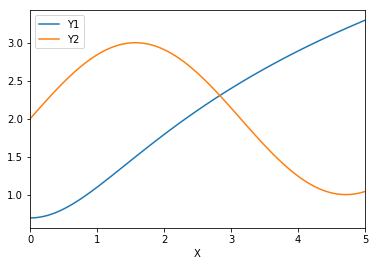

In [60]:
dfp.plot(x = 'X')
plt.show() 

Matplotlib styles are available too:

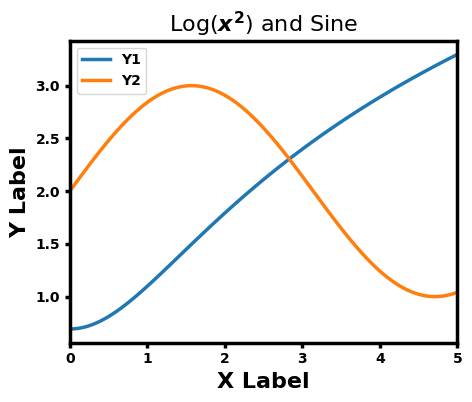

In [61]:
style_name = 'presentation' # This style is set previously in the matplotlib section
plt.style.use(style_name)

dfp.plot(x = 'X')
plt.title('Log($x^2$) and Sine', fontsize=16)
plt.xlabel('X Label', fontsize=16)
plt.ylabel('Y Label', fontsize=16)

plt.show() 

In [62]:
mpl.rcdefaults() # Reset matplotlib rc defaults